In [2]:
import json, gzip, glob
import pandas as pd
from pathlib import Path
from dataclasses import dataclass
from datetime import datetime
from enum import StrEnum, auto
from typing import List


In [3]:
NAME = Path('../../data/yarn_bowl/')
SENSOR_TSV_FILE = next(NAME.glob('*.tsv.gz')) 

In [4]:
class SensorType(StrEnum):
    ACCELEROMETER = 'A'
    MAGNETOMETER = 'M'
    GYROSCOPE = 'G'
    GAS = 'C'

@dataclass
class IMUSensorData:
    sensor_type: SensorType
    datetime: datetime
    x: float
    y: float
    z: float

@dataclass
class GasSensorData:
    sensor_type: SensorType
    datetime: datetime
    value: int


In [5]:
sensor_data: List[IMUSensorData | GasSensorData] = list()

index = None
with gzip.open(SENSOR_TSV_FILE, 'rb') as f:
    for line in f:
        data = line.decode('ascii')
        data = data.split('\t')
        datetime_ = data[0]
        datetime_ = datetime.fromisoformat(datetime_)
        
        sensor_type = SensorType(data[1])
        
        if sensor_type in {SensorType.ACCELEROMETER, SensorType.MAGNETOMETER, SensorType.GYROSCOPE}:
            sensor_data.append(
                IMUSensorData(
                    sensor_type=sensor_type,
                    datetime=datetime_,
                    x = float(data[2]),
                    y = float(data[3]),
                    z = float(data[4])
                )
            )
            pass
        elif sensor_type == SensorType.GAS:
            sensor_data.append(
                GasSensorData(
                    sensor_type=sensor_type,
                    datetime=datetime_,
                    value=float(data[2])
                )
            )
        else:
            raise Exception("Invalid sensor type")

In [6]:
accelerometer_data = list(filter(lambda d: d.sensor_type == SensorType.ACCELEROMETER, sensor_data))
magnetometer_data = list(filter(lambda d: d.sensor_type == SensorType.MAGNETOMETER, sensor_data))
gyroscope_data = list(filter(lambda d: d.sensor_type == SensorType.GYROSCOPE, sensor_data))
gas_data = list(filter(lambda d: d.sensor_type == SensorType.GAS, sensor_data))

array([[<Axes: xlabel='x', ylabel='x'>, <Axes: xlabel='y', ylabel='x'>,
        <Axes: xlabel='z', ylabel='x'>],
       [<Axes: xlabel='x', ylabel='y'>, <Axes: xlabel='y', ylabel='y'>,
        <Axes: xlabel='z', ylabel='y'>],
       [<Axes: xlabel='x', ylabel='z'>, <Axes: xlabel='y', ylabel='z'>,
        <Axes: xlabel='z', ylabel='z'>]], dtype=object)

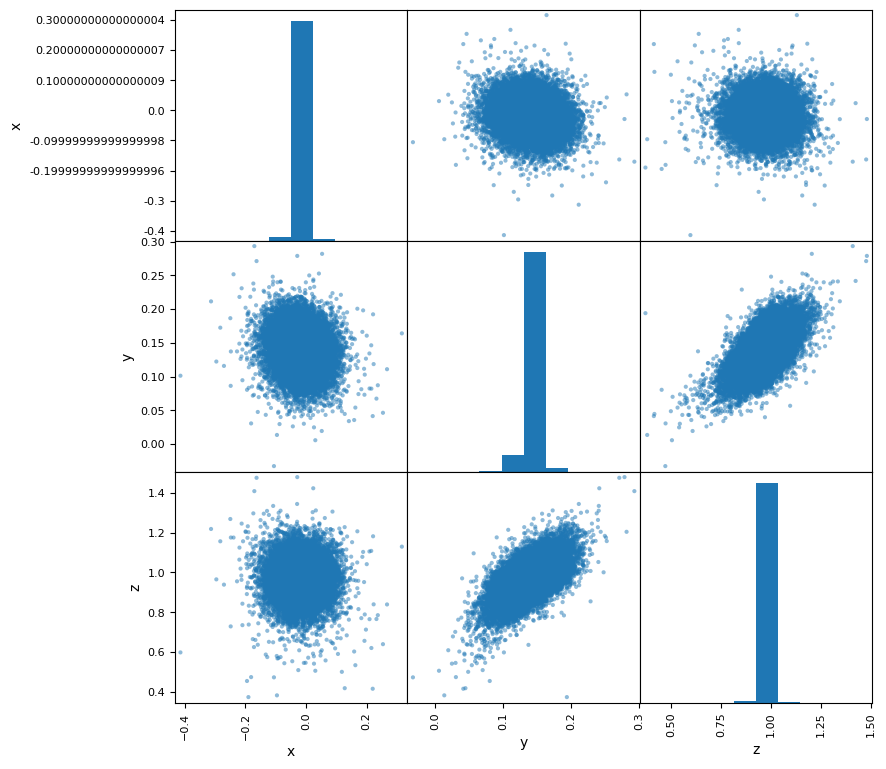

In [13]:
acc_df = pd.DataFrame(iter(accelerometer_data))
pd.plotting.scatter_matrix(acc_df[['x', 'y', 'z']], figsize=(9, 9))

<Axes: xlabel='datetime'>

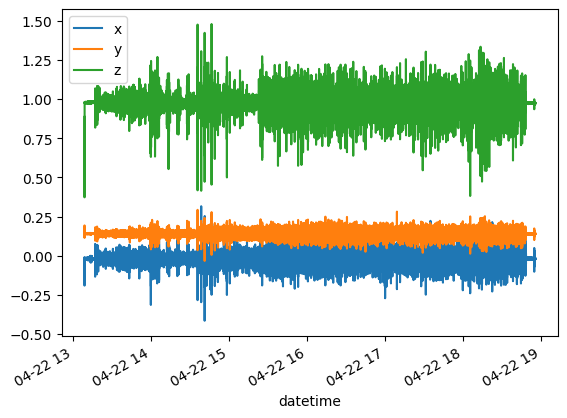

In [8]:
acc_df.plot(x='datetime', y=['x', 'y', 'z'])

<Axes: xlabel='datetime'>

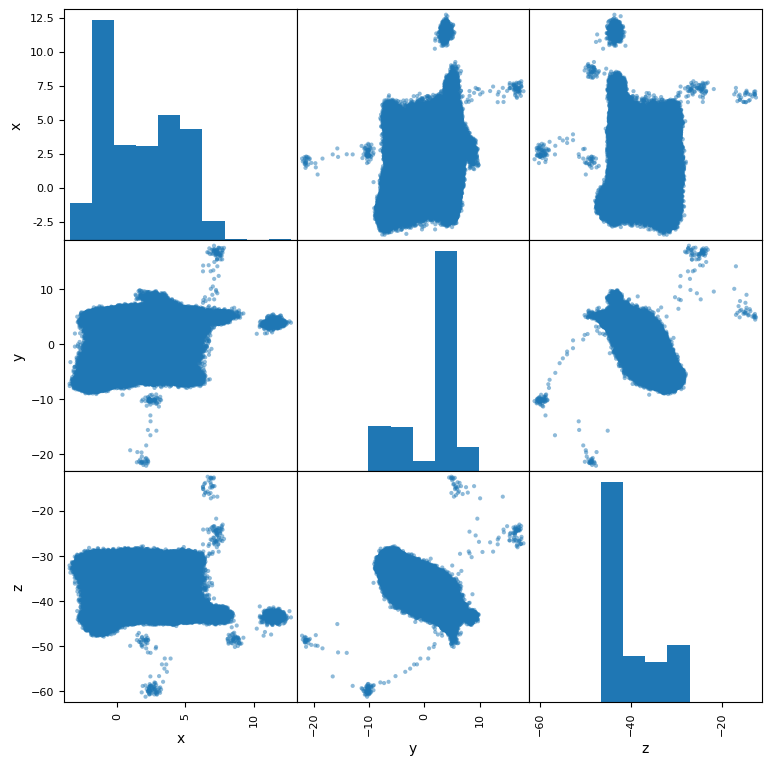

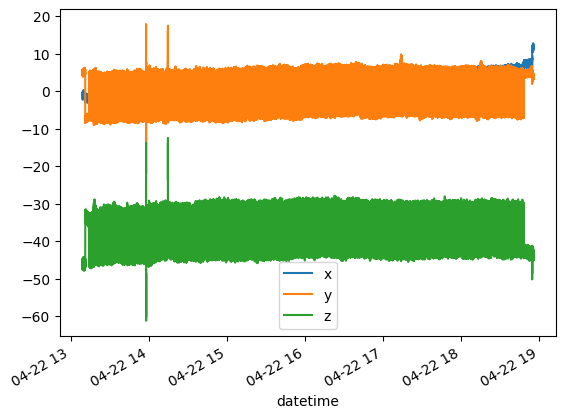

In [9]:
mag_df = pd.DataFrame(iter(magnetometer_data))
pd.plotting.scatter_matrix(mag_df[['x', 'y', 'z']], figsize=(9, 9))
mag_df.plot(x='datetime', y=['x', 'y', 'z'])

<Axes: xlabel='datetime'>

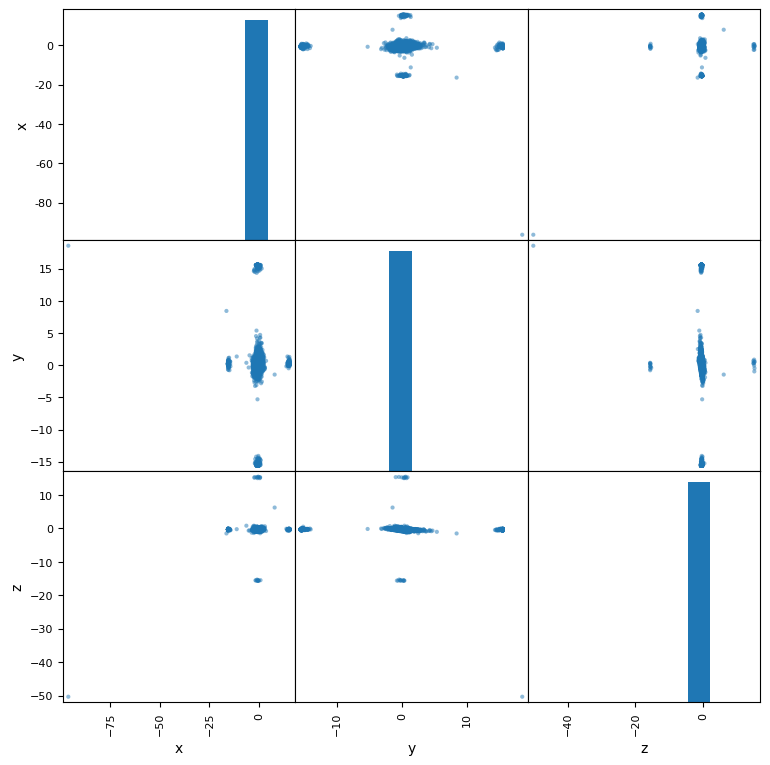

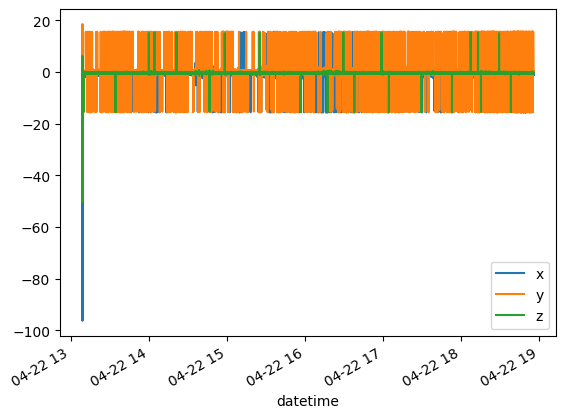

In [10]:
gyr_df = pd.DataFrame(iter(gyroscope_data))
pd.plotting.scatter_matrix(gyr_df[['datetime', 'x', 'y', 'z']], figsize=(9, 9))
gyr_df.plot(x='datetime', y=['x', 'y', 'z'])

In [11]:
gas_df = pd.DataFrame(iter(gas_data))


<Axes: xlabel='datetime'>

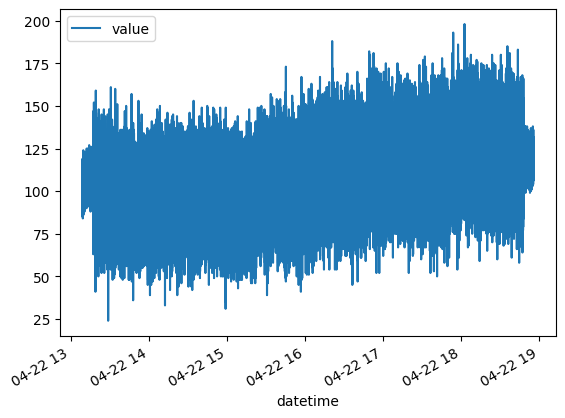

In [12]:
gas_df.plot(x='datetime', y='value')